## Generating CSV

In [81]:
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import IPython.display as ipd
import librosa
import pandas as pd

In [12]:
root_dir="Sound/anil/"
for dir_, _, files in os.walk(root_dir):
    for file_name in files:
        print(file_name)

.DS_Store
.DS_Store
chi_anil_m_Mic_9.wav
chi_anil_m_Mic_8.wav
chi_anil_m_Mic_1.wav
chi_anil_m_Mic_14.wav
chi_anil_m_Mic_3.wav
chi_anil_m_Mic_2.wav
chi_anil_m_Mic_15.wav
chi_anil_m_Mic_11.wav
chi_anil_m_Mic_6.wav
chi_anil_m_Mic_7.wav
chi_anil_m_Mic_10.wav
chi_anil_m_Mic_12.wav
chi_anil_m_Mic_5.wav
chi_anil_m_Mic_4.wav
chi_anil_m_Mic_13.wav
se_anil_m_Mic_8.wav
se_anil_m_Mic_9.wav
.DS_Store
se_anil_m_Mic_10.wav
se_anil_m_Mic_11.wav
se_anil_m_Mic_13.wav
se_anil_m_Mic_12.wav
se_anil_m_Mic_15.wav
se_anil_m_Mic_14.wav
se_anil_m_Mic_2.wav
se_anil_m_Mic_3.wav
se_anil_m_Mic_1.wav
se_anil_m_Mic_4.wav
se_anil_m_Mic_5.wav
se_anil_m_Mic_7.wav
se_anil_m_Mic_6.wav
.DS_Store
chu_anil_m_Mic_1.wav
chu_anil_m_Mic_3.wav
chu_anil_m_Mic_2.wav
chu_anil_m_Mic_6.wav
chu_anil_m_Mic_7.wav
chu_anil_m_Mic_5.wav
chu_anil_m_Mic_4.wav
chu_anil_m_Mic_9.wav
chu_anil_m_Mic_8.wav
chu_anil_m_Mic_15.wav
chu_anil_m_Mic_14.wav
chu_anil_m_Mic_10.wav
chu_anil_m_Mic_11.wav
chu_anil_m_Mic_13.wav
chu_anil_m_Mic_12.wav
.DS_Store
ye

po_anil_m_Mic_3.wav
po_anil_m_Mic_12.wav
po_anil_m_Mic_13.wav
po_anil_m_Mic_2.wav
kha_anil_m_Mic_1.wav
kha_anil_m_Mic_2.wav
kha_anil_m_Mic_15.wav
kha_anil_m_Mic_14.wav
kha_anil_m_Mic_3.wav
kha_anil_m_Mic_7.wav
kha_anil_m_Mic_10.wav
.DS_Store
kha_anil_m_Mic_11.wav
kha_anil_m_Mic_6.wav
kha_anil_m_Mic_4.wav
kha_anil_m_Mic_13.wav
kha_anil_m_Mic_12.wav
kha_anil_m_Mic_5.wav
kha_anil_m_Mic_8.wav
kha_anil_m_Mic_9.wav
.DS_Store
che_anil_m_Mic_11.wav
che_anil_m_Mic_4.wav
che_anil_m_Mic_5.wav
che_anil_m_Mic_10.wav
che_anil_m_Mic_12.wav
che_anil_m_Mic_7.wav
che_anil_m_Mic_6.wav
che_anil_m_Mic_13.wav
che_anil_m_Mic_2.wav
che_anil_m_Mic_3.wav
che_anil_m_Mic_14.wav
che_anil_m_Mic_1.wav
che_anil_m_Mic_15.wav
che_anil_m_Mic_8.wav
che_anil_m_Mic_9.wav
.DS_Store
yu_anil_m_Mic_5.wav
yu_anil_m_Mic_15.wav
yu_anil_m_Mic_14.wav
yu_anil_m_Mic_4.wav
yu_anil_m_Mic_6.wav
yu_anil_m_Mic_7.wav
yu_anil_m_Mic_3.wav
yu_anil_m_Mic_13.wav
yu_anil_m_Mic_12.wav
yu_anil_m_Mic_2.wav
yu_anil_m_Mic_10.wav
yu_anil_m_Mic_11.wav


In [19]:
root_dir="Sound/anil/"
for dir_, _, files in os.walk(root_dir):
    for file_name in files:
        if not file_name == '.DS_Store':
            rel_dir = os.path.relpath(dir_, root_dir)
            rel_file = os.path.join(rel_dir, file_name)
            file_no_ext,ext=os.path.splitext(file_name)

            y, sr = librosa.load(root_dir + rel_file)


            np.savetxt(root_dir+rel_dir+"/"+file_no_ext+".csv",y.transpose(),delimiter=",")

## Generating RPs

In [20]:
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
#import scipy.io
import pyts
import pandas as pd
from pyts.image import RecurrencePlot

In [ ]:
root_dir="Sound/anil/"
for dir_, _, files in os.walk(root_dir):
    for file_name in files:
        if not file_name == '.DS_Store' and file_name[-4:]!= '.wav':
            rel_dir = os.path.relpath(dir_, root_dir)
            rel_file = os.path.join(rel_dir, file_name)
            file_no_ext,ext=os.path.splitext(file_name)
            

            df = pd.read_csv(root_dir + rel_file, index_col=None, header=None)

            count = 0
            end = df.shape[0]
            for i in range(0, end, 600):
                f = i + 600
                frame = df[i:f]

                generate_rp(frame, 6, None, 0, file_no_ext, count)
                count +=1 
                
                
            generate_rp(df[i:], 6, None, 0, file_no_ext, count)



In [115]:
def generate_rp(frame, dimension, threshold, percentage, file_name, count):
    data_rp = []
    data_rp.append(frame.values.reshape(1,-1))
    data_rp.append(frame.values.reshape(1,-1))
    data_rp = np.asarray(data_rp)


    # Recurrence plot transformation

    #X_rp1 = RecurrencePlot(dimension=3, time_delay=1,threshold=None, percentage=0).fit_transform(data_rp[0])[0]
    X_rp1 = RecurrencePlot(dimension=dimension, time_delay=1,threshold=threshold, percentage=percentage).fit_transform(data_rp[0])[0]


    imgplot = plt.imshow(X_rp1, cmap='binary', origin='lower')

    fig1 = plt.gcf()
    #plt.show()
    plt.draw()
    fig1.savefig('Sound/threshold/0/anil/'+file_name+'_RP'+str(count)+'.png')
    






In [ ]:
''''
            




dir_name = root_dir
#map_signal = {"Wav_csv":"seizure activity"}
all_files = os.listdir(dir_name)
li = []

for i in range(1,2):
df = pd.read_csv(dir_name+"/"+all_files[2], index_col=None, header=None)
    

li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.rename(columns={0:dir_name})

frame.head()'''

#Shape: (409700,1)
#i = 3000
#f = 3600
#i=7700
#f=8300

#print(len(frame[:f]))
#print(len(frame[:]))'

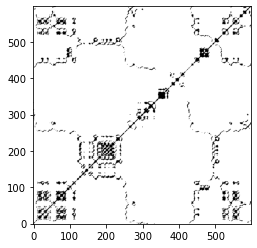

<Figure size 432x288 with 0 Axes>

In [103]:
data_rp = []
data_rp.append(frame.values.reshape(1,-1))
data_rp.append(frame.values.reshape(1,-1))
data_rp = np.asarray(data_rp)


# Recurrence plot transformation

#X_rp1 = RecurrencePlot(dimension=3, time_delay=1,threshold=None, percentage=0).fit_transform(data_rp[0])[0]
X_rp1 = RecurrencePlot(dimension=3, time_delay=1,threshold='point', percentage=5).fit_transform(data_rp[0])[0]


imgplot = plt.imshow(X_rp1, cmap='binary', origin='lower')

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Sound/threshold/0/anil/'+'sample'+'_RP'+'1'+'.png')





### Recurrence Plots for A, C & E at None Threshold

In [ ]:
dir_names = ["/gdrive/My Drive/EEG/S"]

In [ ]:
for dir_name in dir_names:
    all_files = os.listdir(dir_name)
    li = []

    for i in range(len(all_files)):
        df = pd.read_csv(dir_name+"/"+all_files[i], index_col=None, header=None, engine="python")

        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    frame = frame.rename(columns={0:dir_name})

    for i,f in zip(range(0,409100,600), range(700,409700,600)):
        data_rp = []
        data_rp.append(frame[dir_name][i:f].values.reshape(1,-1))
        data_rp.append(frame[dir_name][i:f].values.reshape(1,-1))
        data_rp = np.asarray(data_rp)
        # Recurrence plot transformation
        
        rp = RecurrencePlot(threshold=None)
        X_rp = rp.fit_transform(data_rp[0])[0]

        # Show the results for the first time series
        plt.figure(figsize=(5, 5))
        plt.imshow(X_rp, cmap='binary', origin='lower')
        plt.title('Recurrence Plot', fontsize=16)
        plt.tight_layout()
        plt.savefig("/gdrive/My Drive/EEG/RP_None/"+dir_name[-1]+"/"+str(i)+"-"+str(f)+".png")
        plt.close()
    print(dir_name+" done!")

FileNotFoundError: ignored

### Recurrence Plots for A, C & E at Point Threshold - 5%, 25%, 75%

In [ ]:
for dir_name in dir_names:
    all_files = os.listdir(dir_name)
    li = []

    for i in range(len(all_files)):
        df = pd.read_csv(dir_name+"/"+all_files[i], index_col=None, header=None, engine="python")

        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    frame = frame.rename(columns={0:dir_name})
    for i,f in zip(range(0,40910,700), range(600,409700,700)):
        data_rp = []
        data_rp.append(frame[dir_name][i:f].values.reshape(1,-1))
        data_rp.append(frame[dir_name][i:f].values.reshape(1,-1))
        data_rp = np.asarray(data_rp)
        # Recurrence plot transformation

        rp = RecurrencePlot(threshold='point', percentage=5)
        X_rp = rp.fit_transform(data_rp[0])[0]

        # Show the results for the first time series
        plt.figure(figsize=(5, 5))
        plt.imshow(X_rp, cmap='binary', origin='lower')
        plt.title('Recurrence Plot', fontsize=16)
        plt.tight_layout()
        plt.savefig("RP_5/"+dir_name[-1]+"/"+str(i)+"-"+str(f)+".png")
        plt.close()

In [ ]:
for dir_name in dir_names:
    all_files = os.listdir(dir_name)
    li = []

    for i in range(len(all_files)):
        df = pd.read_csv(dir_name+"/"+all_files[i], index_col=None, header=None, engine="python")

        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    frame = frame.rename(columns={0:dir_name})
    for i,f in zip(range(0,409100,600), range(700,409700,600)):
        data_rp = []
        data_rp.append(frame[dir_name][i:f].values.reshape(1,-1))
        data_rp.append(frame[dir_name][i:f].values.reshape(1,-1))
        data_rp = np.asarray(data_rp)
        # Recurrence plot transformation

        rp = RecurrencePlot(threshold='point', percentage=25)
        X_rp = rp.fit_transform(data_rp[0])[0]

        # Show the results for the first time series
        plt.figure(figsize=(5, 5))
        plt.imshow(X_rp, cmap='binary', origin='lower')
        plt.title('Recurrence Plot', fontsize=16)
        plt.tight_layout()
        plt.savefig("/gdrive/My Drive/EEG/RP_25/"+dir_name[-1]+"/"+str(i)+"-"+str(f)+".png")
        plt.close()
    print(dir_name+" done!")

In [ ]:
for dir_name in dir_names:
    all_files = os.listdir(dir_name)
    li = []

    for i in range(len(all_files)):
        df = pd.read_csv(dir_name+"/"+all_files[i], index_col=None, header=None, engine="python")

        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    frame = frame.rename(columns={0:dir_name})
    for i,f in zip(range(0,40910,700), range(600,409700,700)):
        data_rp = []
        data_rp.append(frame[dir_name][i:f].values.reshape(1,-1))
        data_rp.append(frame[dir_name][i:f].values.reshape(1,-1))
        data_rp = np.asarray(data_rp)
        # Recurrence plot transformation

        rp = RecurrencePlot(threshold='point', percentage=75)
        X_rp = rp.fit_transform(data_rp[0])[0]

        # Show the results for the first time series
        plt.figure(figsize=(5, 5))
        plt.imshow(X_rp, cmap='binary', origin='lower')
        plt.title('Recurrence Plot', fontsize=16)
        plt.tight_layout()
        plt.savefig("RP_75/"+dir_name[-1]+"/"+str(i)+"-"+str(f)+".png")
        plt.close()